### Most of the codes in this notebook copied from http://www.superdatascience.com/wp-content/uploads/2017/02/UCB.zip  
I have very low knowledge of this, I copied it for future use  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [2]:
# Selecting Ads randomly
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data.values[n, ad]
    total_reward = total_reward + int(reward)
print(total_reward)
#Usually between 1100 to 1300

1216


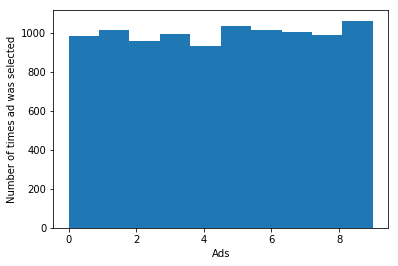

In [3]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

![title](UCB_Algorithm_Slide.png)

In [4]:
# Selecting as per UCB
import math
numbers_of_selections = [0 for i in range(d)]
sums_of_rewards =  [0 for i in range(d)]
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = int(data.values[n, ad])
    sums_of_rewards[ad] += reward
    total_reward += reward

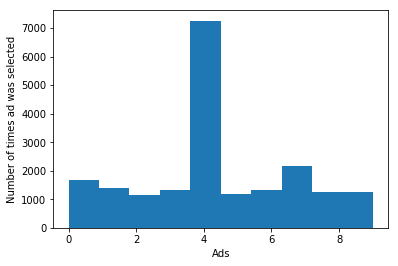

In [5]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

In [6]:
print(total_reward)

2178
